## Dataset


In [1]:
# Upload dataset
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


## Model defining

In [5]:
# Claim models
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras import utils
import matplotlib.pyplot as plt

inputsz = 28*28
hiddensz = 64
outputsz = 10

# define model
model = Sequential()
model.add(Dense(hiddensz, input_dim=inputsz, activation='relu', 
                activity_regularizer=regularizers.l2(10e-5)))
model.add(Dense(outputsz, activation='softmax',
                activity_regularizer=regularizers.l1(10e-5)))


# Define loss funcs and optimizers

In [7]:
# loss functions: https://keras.io/api/losses/
# optimizer: https://keras.io/api/optimizers/
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


## Training via TF

Use Tensorflow lib to do the backpropagation

In [8]:

# Convert labels to categorical one-hot encoding
one_hot_labels = utils.to_categorical(y_train, num_classes=10)

# Train the model, iterating on the data in batches of 32 samples
history = model.fit(x_train, one_hot_labels, epochs=10, batch_size=32)



Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2995 - accuracy: 0.9189
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1530 - accuracy: 0.9581
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1161 - accuracy: 0.9690
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0970 - accuracy: 0.9746
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0853 - accuracy: 0.9776
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0756 - accuracy: 0.9803
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0686 - accuracy: 0.9821
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0624 - accuracy: 0.9840
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0587 - accuracy: 0.9855
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.054

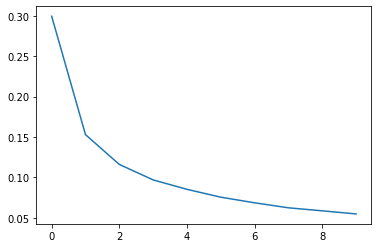

In [9]:
plt.plot(history.history['loss'], label='train')

## Test MLP classifiers

In [10]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import numpy as np

# Overall F1 score
y_pred=np.argmax(model.predict(x_test), axis=1)
print("F1 Score:  ", f1_score(y_test, y_pred, average="macro"))
print("Precision: ", precision_score(y_test, y_pred, average="macro"))
print("Recall:    ", recall_score(y_test, y_pred, average="macro"))
print("Accuracy:  ", np.mean((y_test==y_pred)*1.0))

313/313 [==============================] - 1s 2ms/step
F1 Score:   0.9713204994309044
Precision:  0.9713259431103065
Recall:     0.9713788423940398
Accuracy:   0.9716
